In [1]:
# Importing Libraries 
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
#load my document
df = pd.read_csv('M1_final.csv')
#Checked TOP 5 rows and all columns
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
#changed column names for more readability
column_names = {"OP_UNIQUE_CARRIER":"AIRLINE_CODE",
                "TAIL_NUM":"FLIGHT_NUM",
                "CRS_ELAPSED_TIME":"SCHEDULED_DURATION",
                "CRS_DEP_M":"SCHEDULED_DEP",
                "DEP_TIME_M":"ACTUAL_DEP_TIME",
                "CRS_ARR_M":"SCHEDULED_ARR",
                "sch_dep":"FLT_SCH_ARR",
                "sch_arr":"FLT_SCH_DEP"
               }
#renaming my columns
df = df.rename(column_names, axis=1)

#checked my columns  and decided to drop the one I do NOT need , are not numerical.
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUM,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEP,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,FLT_SCH_ARR,FLT_SCH_DEP,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
# I'm dropping not numerical columns 
df=df.drop(columns=['AIRLINE_CODE', 'FLIGHT_NUM', 'DEST', 'Wind','Condition'])

In [5]:
#checking on my table, how it presents now.
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEP,ACTUAL_DEP_TIME,SCHEDULED_ARR,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,FLT_SCH_ARR,FLT_SCH_DEP,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34,58,25,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,34,58,25,38,29.86,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,32,58,24,35,29.91,9,17,13


In [6]:
# Creating corrleation matrix to check  the strength and direction of the relationship between each pair of variables.

corr_matrix=df.corr().round(1)
corr_matrix

C:\Users\Maciej JAROS\AppData\Local\Temp\ipykernel_21420\1940032781.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr().round(1)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEP,ACTUAL_DEP_TIME,SCHEDULED_ARR,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,FLT_SCH_ARR,FLT_SCH_DEP,TAXI_OUT
MONTH,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.1,0.0,-0.0,-0.1,-0.1,-0.0,-0.0,0.0
DAY_OF_MONTH,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.1,0.1,-0.1,-0.1,0.0,-0.0,0.0,-0.0
DAY_OF_WEEK,0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.0
DEP_DELAY,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.1,0.1,0.0,-0.0,-0.0,0.1,0.0,-0.1,-0.1,-0.0,0.0
SCHEDULED_DURATION,-0.0,0.0,0.0,-0.0,1.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.1,-0.1,0.1
DISTANCE,-0.0,-0.0,0.0,-0.0,1.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.1,-0.1,0.1
SCHEDULED_DEP,0.0,0.0,0.0,0.1,-0.0,-0.0,1.0,0.9,0.5,0.1,0.0,0.0,-0.0,-0.0,-0.0,0.5,0.0
ACTUAL_DEP_TIME,0.0,0.0,0.0,0.1,-0.0,-0.0,0.9,1.0,0.5,0.1,-0.0,0.0,-0.0,-0.0,0.0,0.5,0.1
SCHEDULED_ARR,-0.0,0.0,-0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.1,-0.0,0.0,0.0,-0.0,0.1,0.4,0.1
Temperature,0.1,-0.1,0.0,-0.0,-0.0,-0.0,0.1,0.1,0.1,1.0,0.1,0.0,-0.0,-0.4,-0.0,0.1,-0.1


<AxesSubplot: >

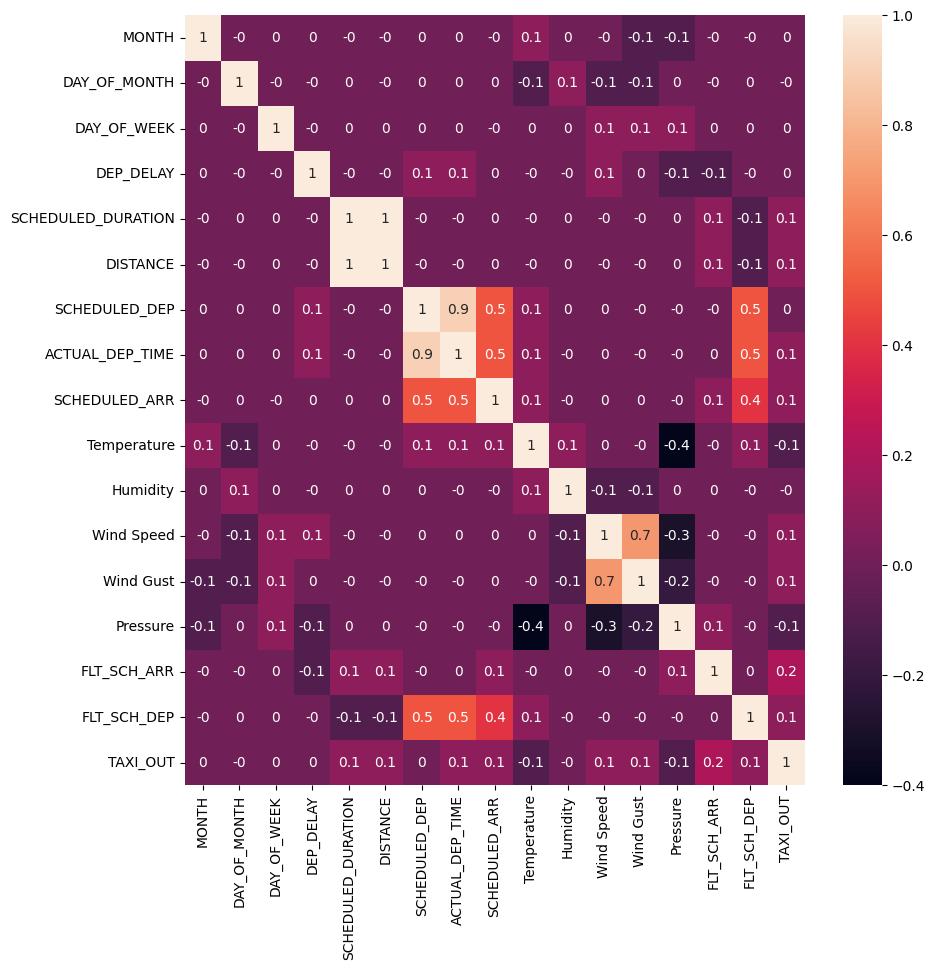

In [7]:
#heat map is the  type of data visualization that is used to represent data in a more intuitive and visually appealing way
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)

In [8]:
# I'm creating to variable X to hold all rows all columns excluding last column
# Creating variable y to hold all rows of ONLY LAST column 

X=df.iloc[: , :-1].values
y=df.iloc[: , -1].values



In [9]:
# splitting my X and y to testing and training sets , in  this example is 90/10. 90% training 10% for test.
X_train, X_test, y_train , y_test= train_test_split(X,y, test_size=0.1, random_state=32)

In [10]:
#  I use StandardScaler to standardize the training and testing data. 
# first  created var scale  to hold StandarScaler()
scale=StandardScaler()
# I'm using fit_transform method  on X_train to fit the StandardScaler to the training data 
# and simultaneously transform the data so that it is standardized. 
X_train=scale.fit_transform(X_train)
#t's important that I ONLY use the transform method on the testing data , because I want the testing data 
# to be transformed based on the statistics computed from the training data. This is life scenario when I use 
# trained ML model to make predictions on new unseen before data.
X_test=scale.transform(X_test)

In [11]:
# I'm creating an instance of the LinearRegression class and stores it in the lin_r variable.
lin_r= LinearRegression()

# the fit method is called on lin_r and passed X_train and y_train as arguments. 
# This trains the linear regression model on the training data and fits the best-fitting line to the data.
lin_r.fit(X_train,y_train)


LinearRegression()

In [12]:
#The resulting trained model (right above) can then be used to make predictions on new, 
# unseen data by calling the predict method and passing it the test data(our X_test)
prediction=lin_r.predict(X_test)

In [13]:
# My line of code is using/creating a Pandas DataFrame that compares the actual target values y_test with the predicted values from the linear regression model prediction.

pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

,Actual,Predicted
0,23,22.421101
1,14,22.096407
2,22,22.874906
3,19,24.688437
4,20,18.603094
...,...,...
2877,32,24.085143
2878,17,20.328365
2879,20,19.147395
2880,18,18.561964


In [14]:
# This lines of code are evaluating the performance of the linear regression model by computing several common regression evaluation metrics.
# Which are : Mean Absolute Error ,Mean Squared Error,Root Mean Squared Error ,R-squared (R2).

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R2:', metrics.r2_score(y_test,prediction))

MAE: 5.248585491705619
MSE: 43.37695893616932
RMSE: 6.586118654880834
R2: 0.09101501674701984


In [15]:
# I'm creating a polynomial regression model(still Linear Regression) using the scikit-learn library in Python.
#The PolynomialFeatures class generates a new feature matrix by transforming the input feature  matrix by adding powers of each feature up to the specified degree(in our case degree=2)
poly_reg=PolynomialFeatures(degree=2) 

# Here we use fit_transform method on the training data X_train and stores the resulting polynomial feature matrix in the X_train_2 variable.
#  The code then calls the transform method on the test data X_test and stores the resulting polynomial feature matrix in the X_test_2 variable.
X_train_2=poly_reg.fit_transform(X_train)
X_test_2=poly_reg.transform(X_test)


#I'm creating an variable of the LinearRegression class and stores it in the mul_reg var.
mul_reg=LinearRegression()
# Here I'm using  fit method on the mul_reg variable and pass the polynomial feature matrices X_train_2 and y_train as arguments.
mul_reg.fit(X_train_2,y_train)

LinearRegression()

In [16]:
#The resulting trained model (right above) can then be used to make predictions on new, 
# unseen data by calling the predict method and passing it the test data(our X_test_2)

mul_pred=mul_reg.predict(X_test_2)


In [17]:

# I'm using pandas dataframe to show two columns with actual y_test and predicted mul_pred (X_test_2) for comparison
pd.DataFrame({ 'Actual' : y_test, 'Predicted': mul_pred})

,Actual,Predicted
0,23,21.393614
1,14,25.168547
2,22,22.609709
3,19,23.355192
4,20,18.244841
...,...,...
2877,32,28.306669
2878,17,22.777342
2879,20,20.092985
2880,18,18.127195


In [18]:
# This are results of Linear Regressions with Polynomial Features which we can see R2 is more precise than before.
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,mul_pred)))
print('R2:', metrics.r2_score(y_test,mul_pred))

MAE: 5.0838399631624664
MSE: 41.497677414857826
RMSE: 6.4418690932723734
R2: 0.1303962625529025


In [19]:
#random forest regression  
#n_estimators that's a number of combination different trees , less trees faster , more trees more complex slower

rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [20]:

rf_reg_pred=rf_reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
0,23,23.95
1,14,19.44
2,22,23.65
3,19,18.28
4,20,19.82
...,...,...
2877,32,27.42
2878,17,23.51
2879,20,22.55
2880,18,19.74


In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rf_reg_pred)))
print('R2:', metrics.r2_score(y_test,rf_reg_pred))

MAE: 4.348396946564885
MSE: 31.41194281748786
RMSE: 5.604635832727034
R2: 0.3417476693579542
